In [4]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv(r'.\Placement_Data_Full_Class.csv')
data=data.iloc[:,1:]
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
data['salary']=data['salary'].fillna(0)
data.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

### 对定性数据进行独热编码

In [7]:
cat_cols=["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation"]
data_dumcat=pd.get_dummies(data[cat_cols]) 
data_dumcat

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
211,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0
212,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0
213,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1


### 对定量数据进行标准化

In [8]:
from sklearn.preprocessing import StandardScaler
num_cols=["ssc_p","hsc_p","degree_p","etest_p","mba_p"]
sc = StandardScaler()
data_scaled=sc.fit_transform(data[num_cols])
data_scaled = pd.DataFrame(data_scaled,columns=num_cols)
x=data_scaled.merge(data_dumcat, left_index=True, right_index=True, how = "right")
y=data[['status','salary']]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y['status'],test_size=0.2,random_state=123)

### 降维

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components='mle').fit(x_train)
x_trainPCA=pca.transform(x_train)
x_testPCA=pca.transform(x_test)
print(x_trainPCA.shape)
print(x_testPCA.shape)

(172, 14)
(43, 14)


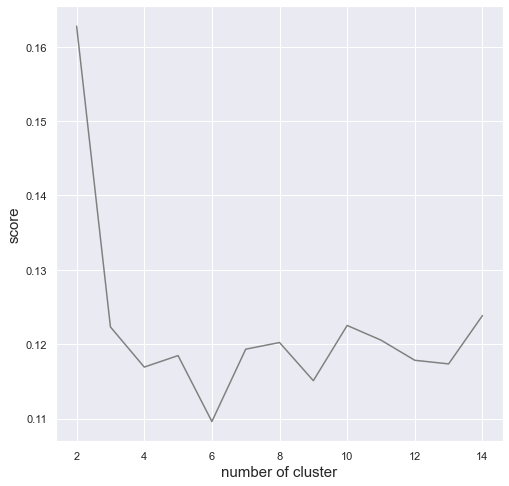

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouettteScore=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,random_state=123).fit(x_trainPCA)
    score1=silhouette_score(x_trainPCA,kmeans.labels_)
    silhouettteScore.append(score1)
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
plt.plot(range(2,15),silhouettteScore,linestyle='-',color='grey')
plt.xlabel('number of cluster',fontsize=15)
plt.ylabel('score',fontsize=15)
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
for i in model:
    params={'max_leaf_nodes':[i for i in range(2,20)]}
    score = GridSearchCV(i, param_grid=params, scoring='recall')
    score.fit(X_train,y_train)
    print(score.best_params_)
    print(score.best_estimator_)
    print(f"Recall score: {score.best_score_}")
    pred=score.predict(X_test)
    print(f"Recall score of test data: {recall_score(y_test, pred)}")
    print(classification_report(y_test,pred))
    sns.heatmap(confusion_matrix(y_test,pred), annot=True)
    plt.show()

NameError: name 'GridSearchCV' is not defined

### 支持向量机

In [26]:
svm_data=SVC().fit(x_trainPCA,y_train)
from sklearn.metrics import *
y_predict=svm_data.predict(x_testPCA)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

  Not Placed       0.82      0.56      0.67        16
      Placed       0.78      0.93      0.85        27

    accuracy                           0.79        43
   macro avg       0.80      0.74      0.76        43
weighted avg       0.79      0.79      0.78        43



In [28]:
from sklearn.svm import SVC 
svm_data=SVC().fit(x_trainPCA,y_train)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_data, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.08 %
Standard Deviation: 6.40 %


0.813953488372093 0.020235896477251554


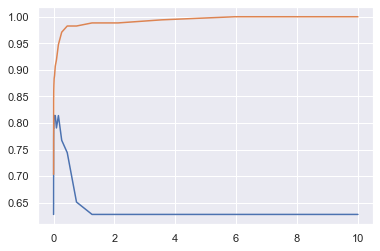

In [29]:
score = []
score_test = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf=SVC(kernel="rbf",gamma = i,cache_size=5000).fit(x_trainPCA,y_train)
    score.append(clf.score(x_testPCA,y_test))
    score_test.append(clf.score(x_trainPCA,y_train))
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.plot(gamma_range,score_test)
plt.show()

### logist回归

In [30]:
from sklearn.linear_model import LogisticRegression
lr_data=LogisticRegression().fit(x_trainPCA,y_train)
accuracies = cross_val_score(estimator = lr_data, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.13 %
Standard Deviation: 7.84 %


### 随机森林

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc_data=RandomForestClassifier().fit(x_trainPCA,y_train,)

In [52]:
from sklearn.datasets import load_wine
wine=load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

(36,)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
Wine_xtrain,Wine_xtest,Wine_ytrain,Wine_ytest=train_test_split(wine.data,wine.target,test_size=0.2,random_state=100)
scalewine=MinMaxScaler().fit(Wine_xtrain)
wine_xtrain=scalewine.transform(Wine_xtrain)
wine_xtest=scalewine.transform(Wine_xtest)

In [65]:
svm_wine=SVC().fit(wine_xtrain,Wine_ytrain)
wine_ypred=svm_wine.predict(wine_xtest)
svm_wine.score(Wine_xtest,wine_ypred)

0.4444444444444444

In [ ]:
winescore=[]
gammar_range=logspace(-10,1,50)
for i in gammar_range:
    svm_wine1=SVC(C=0.1,gamma=i).fit(wine_xtest,Wine_ytrain)
    winescore.append(svm_wine1.score(Wine_xtest,Wine_ytest))
    
